In [10]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
import octopus

Populating the interactive namespace from numpy and matplotlib


Direct detection

\begin{equation}
\dfrac{dR}{dE_r}(E_r, t) = \dfrac{\sigma_{\chi} \rho_0}{2 \mu^2 m_{\chi}}A^2F^2(E_r) \times g(v_{min})
\end{equation}

$R:$ Even rates

$E_r:$ Recoil Energy

$\sigma_{\chi}:$ WIMP cross section

$\rho_0:$ WIMP density in the solar neighborhood

$\mu:$ reduced mass of the proton and WIMP particle

$A:$ atomic mass number of the detector nuclei.

$F(E_r):$ Form factor
\begin{equation}
g(v_{min}) = \int_{v_{min}}^{\infty} \dfrac{f(v)}{v} dv
\end{equation}

In [2]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [59]:
def Nbody_snaps(snap, Nhost):
    path = '../../MW_anisotropy/code/test_snaps/'
    positions = readsnap(path + snap,'pos', 'dm')
    velocities = readsnap(path + snap,'vel', 'dm')
    
    pos_disk = readsnap(path + snap, 'pos', 'disk')
    vel_disk = readsnap(path + snap, 'vel', 'disk')
    pot_disk = readsnap(path + snap,'pot', 'disk')
    
    M = readsnap(path + snap,'mass', 'dm')

    pos_cm, vel_cm = CM_disk_potential(pos_disk[:,0], pos_disk[:,1], pos_disk[:,2],
                     vel_disk[:,0], vel_disk[:,1], vel_disk[:,2], pot_disk)
    positions_cm = re_center(positions, pos_cm)
    velocities_cm = re_center(velocities, vel_cm)
          
    print('CM pos:', pos_cm)
    print('CM vel:', vel_cm)
    
    pos_disk_cm = re_center(pos_disk, pos_cm)
    #vel_disk_cm = re_center(vel_disk, vel_cm)
    scatter(pos_disk_cm[:,0], pos_disk_cm[:,1])
    xlim(-30, 30)
    ylim(-30, 30)
    
    particles_ids = readsnap(path + snap, 'pid', 'dm')
    ID = np.sort(particles_ids)
    
    # The first set of particles are from the host DM halo, the
    # second set are from the satellite DM halo, the limit is know by
    # the number of particles in the host halo.
    
    idcut = ID[Nhost-1]
    index_mw = np.where(particles_ids<=idcut)[0]
    index_LMC = np.where(particles_ids>idcut)[0]
    mw_pos = positions_cm[index_mw]
    mw_vel = velocities_cm[index_mw]
    lmc_pos = positions_cm[index_LMC]
    lmc_vel = velocities_cm[index_LMC]

    return mw_pos, mw_vel, M[index_mw], lmc_pos, lmc_vel, M[index_LMC]

def CM_disk_potential(x, y, z, vx, vy, vz, Pdisk):
    V_radius = 2 
    min_pot = np.where(Pdisk==min(Pdisk))[0]
    x_min = x[min_pot]
    y_min = y[min_pot]
    z_min = z[min_pot]
    # This >2.0 corresponds to the radius in kpc of the particles that
    # I am taking into account to compute the CM
    avg_particles = np.where(np.sqrt((x-x_min)**2.0 + (y-y_min)**2.0 + (z-z_min)**2.0)<V_radius)[0]
    x_cm = sum(x[avg_particles])/len(avg_particles)
    y_cm = sum(y[avg_particles])/len(avg_particles)
    z_cm = sum(z[avg_particles])/len(avg_particles)
    vx_cm = sum(vx[avg_particles])/len(avg_particles)
    vy_cm = sum(vy[avg_particles])/len(avg_particles)
    vz_cm = sum(vz[avg_particles])/len(avg_particles)
    return [x_cm, y_cm, z_cm], [vx_cm, vy_cm, vz_cm]


def re_center(pos, cm):
    """ 
    Re center a halo to its center of mass.
    """
    pos_n = np.copy(pos)
    for i in range(3):
        pos_n[:,i] = pos[:,i] - cm[i]
    return pos_n

In [60]:
path = '../../MW_anisotropy/code/test_snaps/'
snap = 'MW_11LMC6_40M_b0_113'
MW_pos_iso = readsnap(path + snap, 'pos', 'dm')
MW_vel_iso = readsnap(path + snap, 'vel', 'dm')

Returning DM    Positions
Returning DM    Velocities


Returning DM    Positions
Returning DM    Velocities
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Mass
CM pos: [-6.0124268852779403, 54.289914705307538, -1.0140167814864449]
CM vel: [10.81692701789653, 35.612446603568138, -40.60794455146997]
Returning DM    Particle IDs


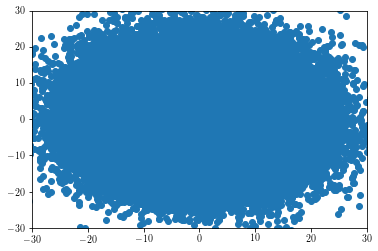

In [61]:
mw_pos, mw_vel, mw_M, lmc_pos, lmc_vel, lmc_M  = Nbody_snaps('MW_11LMC6_40M_b0_113', 37500000)

In [51]:
r_sun = [-8.299, 0.0, 0.027]
v_sun = [0.0, 220.0, 0.0] # Kuhlen e.a 2012 page 8

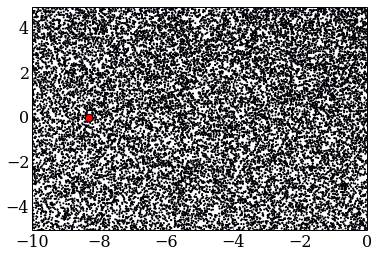

In [10]:
scatter(xlmc, ylmc, s=1.0)
xlim(-10, 0)
ylim(-5, 5)
scatter(r_sun[0], r_sun[1], s=60, c='r')

In [52]:
def solar_n_wedge(pos, vel, M):
    """
    Solar wedge definition
    """
    index = np.where((pos[:,0]>-9) & (pos[:,0]<-8) & (pos[:,2]<2.5) & (pos[:,2]>-2.5) & (pos[:,1]<1.5) & (pos[:,1]>-1.5))[0]
    return pos[index,0], pos[index,1], pos[index,2], vel[index,0], vel[index,1], vel[index,2], M[index]
    
    

In [53]:
x_sn, y_sn, z_sn, vx_sn, vy_sn, vz_sn, M_lmc_sn = solar_n_wedge(lmc_pos, lmc_vel, lmc_M)

In [54]:
x_mw_sn, y_mw_sn, z_mw_sn, vx_mw_sn, vy_mw_sn, vz_mw_sn, M_mw_sn = solar_n_wedge(mw_pos, mw_vel, mw_M)

In [66]:
M_lmc_sn[0]

3.9996412e-06

In [68]:
N_particles_lmc_sn = len(x_sn)
N_particles_mw_sn = len(x_mw_sn)
print(N_particles_lmc_sn/N_particles_mw_sn)

sn_LMC_tM = N_particles_lmc_sn*sum(M_lmc_sn)
sn_MW_tM = len(x_mw_sn)*sum(M_mw_sn)
print(1/(sn_MW_tM/sn_LMC_tM))

0.0008633093525179857
7.08753085681e-07


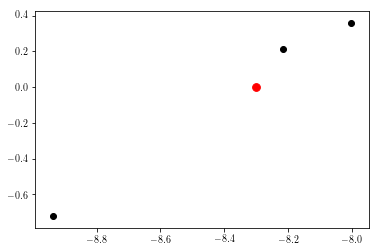

In [67]:
scatter(x_sn, y_sn, c='k')
scatter(r_sun[0], r_sun[1], s=60, c='r')

In [52]:
def speed_distribution(Vx, Vy, Vz):
    return np.sqrt(Vx**2.0 + Vy**2.0 + Vz**2.0)

In [54]:
s_d = speed_distribution(vx_sn, vy_sn, vz_sn)

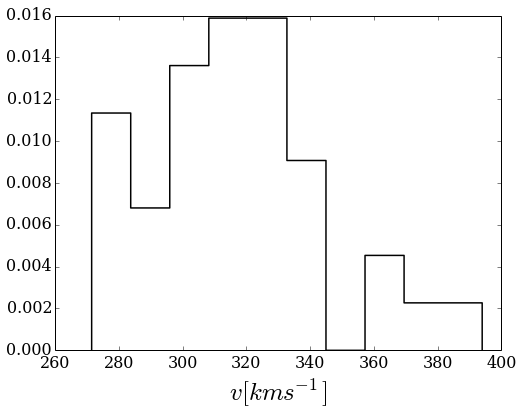

In [55]:
figure(figsize=(8, 6))
h1 = hist(s_d, histtype='step', color='k', lw=1.5, normed='true')
#ylim(0, 2.2)
xlabel('$v[km s^{-1}]$', fontsize=25)

In [40]:
v_LSR = np.array([0.0, 220.0, 0.0])# update to McMillan value.
v_pec = np.array([10, 5.23, 7.17]) # Schonreich, Nitya! McMillan, check vy
v_earth1 = 29.8 * np.array([0.99, 0.11,-0.01])
v_earth2 = 29.8 * np.array([-0.06, 0.49,-0.86])

In [41]:
earth_velocity = v_LSR + v_pec + v_earth1

In [42]:
earth_velocity

array([  39.502,  228.508,    6.872])

In [43]:
def speed_distribution_earth(Vx, Vy, Vz, ev):
    Vx = Vx - ev[0]
    Vy = Vy - ev[1]
    Vz = Vz - ev[2]
    return np.sqrt(Vx**2.0 + Vy**2.0 + Vz**2.0)

In [44]:
s_de = speed_distribution_earth(vx_sn, vy_sn, vz_sn, earth_velocity)

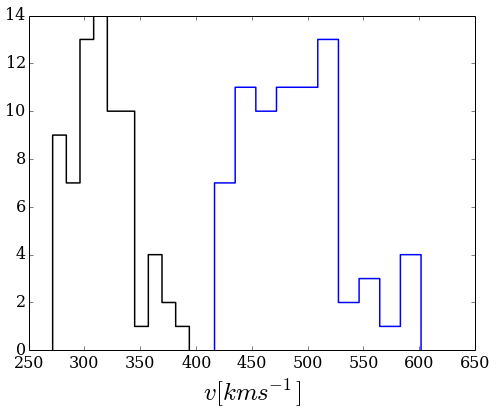

In [46]:
figure(figsize=(8, 6))
h1 = hist(s_d, histtype='step', color='k', lw=1.5)
h2 = hist(s_de, histtype='step', color='b', lw=1.5)
#ylim(0, 4.2)
xlabel('$v[km s^{-1}]$', fontsize=25)

to do:
    - Local distribution of the halo of the MW
    - Run the high res simulation
    - Study the density of DM particle in the LN from the LMC in the future.